In [11]:
name = "Eetu Määttä"
id = 2420629

In [12]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_09_Signals.csv


In [13]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [14]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [15]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_09_Fix.txt', 'bidmc_09_Signals.csv']

In [16]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

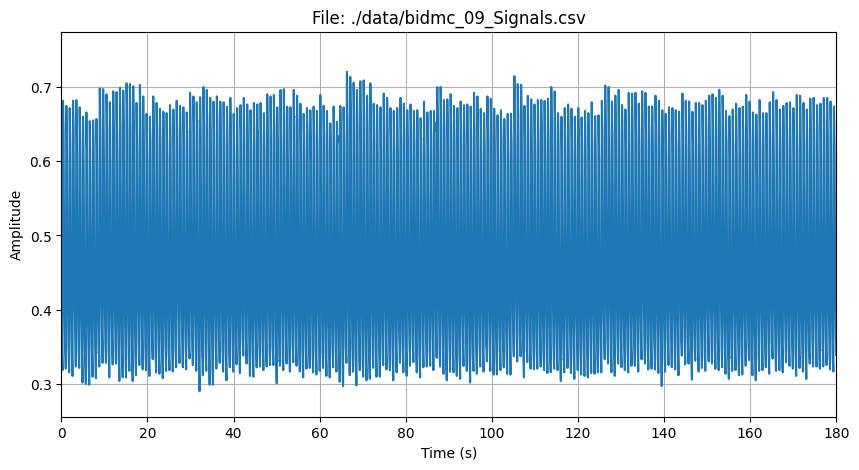

In [17]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 5))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

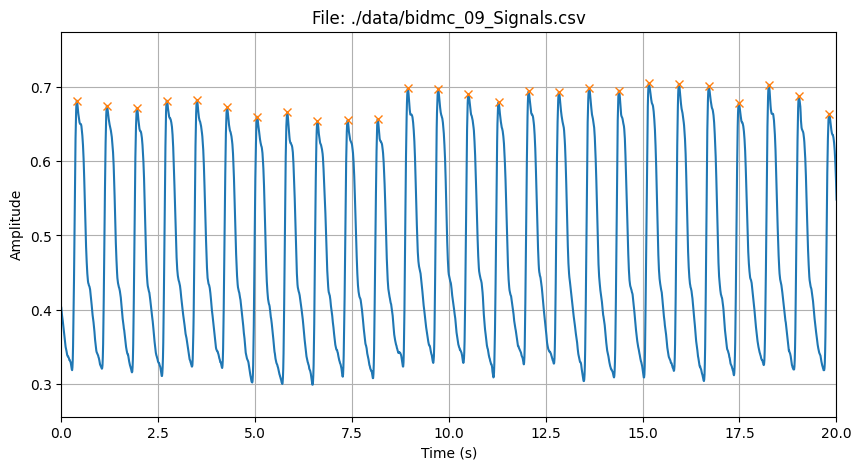

Mean IBI: 781.41 ms
Heart rate: 76.78 bpm
rMSSD / PPI Variation: 8.70 ms


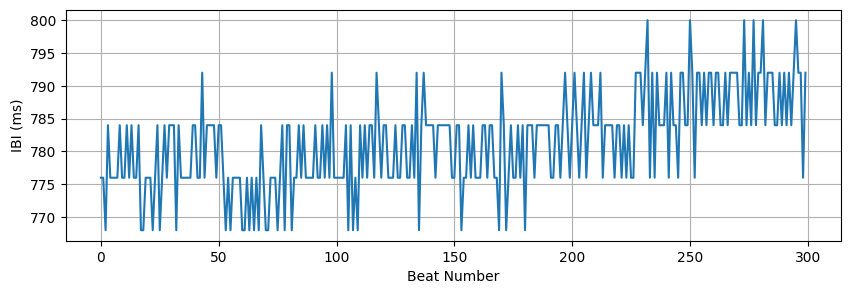

In [18]:
# Continue coding here ...

peaks, properties = find_peaks(ppg, height=0.5)
peaks_amp = properties['peak_heights']
plt.figure(figsize = (10, 5))
plt.plot(t,ppg)
plt.plot(t[peaks], ppg[peaks], "x")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 20)
plt.grid()
plt.show()

ppi = np.diff(peaks)*ts*1000
i = (ppi>765) & (ppi<805)
ppi = ppi[i]

ppi=ppi[0:300]

mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')
hr=60000/mean_ppi
print(f'Heart rate: {hr:.2f} bpm')

x_sd = np.std(ppi)

x_rmssd = np.sqrt(np.mean(np.diff(ppi)**2))
print(f'rMSSD / PPI Variation: {x_rmssd:.2f} ms')


plt.figure(figsize=(10,3))
plt.plot(ppi)
plt.xlabel("Beat Number")
plt.ylabel("IBI (ms)")
plt.grid()
plt.show()

In [19]:
# Remember to add your interpretations ...

# !-! ChatGPT was used to help me understand these values in more detail than I was aware of before. !-!

# Firstly, the patient's heart rate is slightly elevated, rMSSD is slightly lower than regular, both of which can be a symptom of stress or physical exertion.
# In more detail, the Mean Interbeat Interval (Mean IBI) was around 87ms lower than the average data from the '02. Heart rate and HRV' (document*) document.
# This can be interpreted as a higher heart rate, which may suggest stress, physical exertion, or even reduced cardiovascular efficiency.

# Secondly, the heart rate was around 7,63 bpm higher than the average data from the document*. This may suggest the patient was under physical stress, 
# emotional stress, or illness. When someone is in a fight or flight state, the Heart rate tends to rise.

# Thirdly, the rMSSD / PPI variation was around 12,7ms lower than the average data from the document*. This may suggest lower parasympathetic activity,
# meaning the patient may be under stress or not fully recovering. It can be associated with fight or flight dominance, potentially signaling fatigue,
# poor recovery, or health concerns.

# In shorter words, the patient was probably either physically exerted, or under physical or mental stress when these values were taken.